# Presenting Structured Data
In this notebook we will be exploring the presentation of data with a range of tools. Create your Prac9 directory and copy the hospitals data file (govhack3_FOP.csv) into the directory.

**Note:** Make sure you are working in I drive - or an area where your files will be saved. You do this by changing to I drive, navigating to the Prac 9 directory and then typing "jupyter notebook" in the terminal. This will open a new browser tab with the jupyter notebook dashboard and then you're files will save to the directory when you click the save button.

In [2]:
#import matplotlib and make it inline for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Matplotlib
Matplotlib is part of standard Python and will always be available. 

**Pros**
- always available - nothing to install
- publication quality output
- recently introduced styles (See: https://matplotlib.org/users/style_sheets.html)

**Cons**
- prettier outputs are available
- doesn't provide csv and dataframe tools

**Example:**

In [3]:
with open('govhack3_FOP.csv') as fileobj:
    lines = []
    for line in fileobj.readlines():
        lines.append(line.split(','))
headers=lines[0].copy()
del lines[0]
print(lines[-3:])
print(headers)   

[['28-Jun-14', '2014_06', '239', '95', '5', '32', '93', '93', '16', '158', '73', '3', '19', '67', '55', '14', '244', '37', 'N/A', '11', '56', '172', '4', '39', 'N/A', 'N/A', 'N/A', 'N/A', '25', '11', '197', '100', '6', '46', '82', '59', '4', '195', '13', 'N/A', '19', '82', '82', '12', '129', '28', 'N/A', '19', '56', '46', '7', '162', '21', 'N/A', '21', '48', '89', '3', '252', '65', 'N/A', '20', '89', '134', '9                                                                                                                                                                                                                                                                                                \n'], ['29-Jun-14', '2014_06', '218', '87', '15', '19', '67', '101', '16', '142', '59', 'N/A', '27', '55', '38', '20', '242', '42', 'N/A', '16', '45', '170', '10', '29', '7', 'N/A', 'N/A', '6', '18', '4', '179', '89', '8', '36', '77', '53', '5', '181', '16', 'N/A', '20', '63', '90', '8', '142', '29

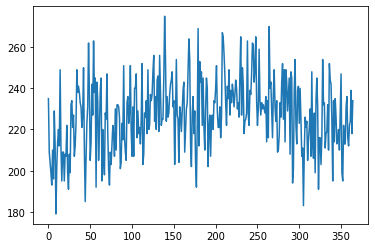

In [4]:
RPH_attendance = []
for line in lines:
    RPH_attendance.append(int(line[2]))
plt.plot(RPH_attendance)

** Styles **

Exploring the matplotlib styles. Start by listing what's available. You can also define your own.

Putting the style in a "with" statement restricts it to that block - otherwise it affects every plot that follows.

In [5]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


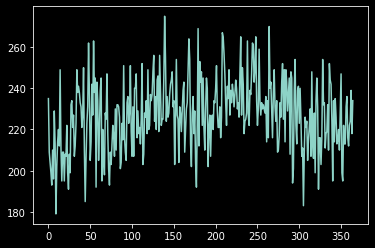

In [6]:
with plt.style.context(('dark_background')):
    plt.plot(RPH_attendance)

# Pandas
Pandas is part of Python and will always be available. It adds Dataframe objects and operations, along with a wrapper around matplotlib to make it easy to use with Dataframes.

**Pros**
- always available
- simpler methods for plotting
- pandas gives lots of useful support to tabular data
- styles available to easily apply an overall, consistent style to plots. ** Note: ** the styles used to be in pandas, but have now been moved back to matplotlib, so you will get a warning with the code from the lectures and some websites.

**Cons**
- still may need to know matplotlib if needing specific tweaking of plots

**Example:**

In [7]:
import pandas as pd
hospitals = pd.read_csv("govhack3_FOP.csv", header=0) 


ModuleNotFoundError: No module named 'pandas'

In the matplotlib example, we worked with lists. Using pandas, we can read in the csv file (above) and all the data, plus the labels, is put into a DataFrame called **hospitals**. If we want to get an overview of each column in the DataFrame, we use **hospitals.describe()** which calls the describe() method on the hospitals object, which is a DataFrame.

In [ ]:
hospitals.describe()

To look at the actual **values** in the dataset, we can view the first 5 (default #) rows by using the **head( )** method...  

How do you think we can get the first 10 rows? Change the code below to get the first 10 rows.

In [ ]:
hospitals.head()

There's an equivalent method for viewing the **last** 5 rows... enter it in the cell below and then change it from the default 5 rows to 10 rows.

In [ ]:
# enter your code for viewing the last 10 lines 
hospitals.tail()

To choose one column of data to view, put the column label in square brackets. This works with head( ) and describe( ) - pretty much anywhere you use the dataframe...

In [ ]:
hospitals['RPH_Attendance'].describe()

In [ ]:
hospitals['RPH_Attendance'].head()

Pandas gives us a **plot( )** method for plotting the data in the DataFrame. The default plot type is a blue line - as we are used to. The plot method returns an object, which we can hold in the variable my_plot - then add labels etc to the plot object.


In [ ]:
my_plot = hospitals['RPH_Attendance'].plot()
my_plot.set_title("RPH Attendance") 
my_plot.set_xlabel("Day Number") # this will just be the numbers from 0-364
my_plot.set_ylabel("Count")
type(my_plot)

It's not actually continuous datat we're working with, so we shouldn't use a line plot. We can pass arguments (e.g. kind="bar") to the plot method to alter the plot type (as opposed to calling plot( ), plt.bar( ) etc.). 

In [ ]:
my_plot = hospitals['RPH_Attendance'].plot(kind='bar',legend=None, title="RPH Attendance") 
my_plot.set_xlabel("Day Number") # this will just be the numbers from 0-364
my_plot.set_ylabel("Count")
type(my_plot)

We can also call the bar plot method using .plot.bar()... all else looks the same...

In [ ]:
my_plot = hospitals['RPH_Attendance'].plot.bar()
my_plot.set_title("RPH Attendance") 
my_plot.set_xlabel("Day Number") # this will just be the numbers from 0-364
my_plot.set_ylabel("Count")
type(my_plot)

The gain here is we can use tab to get a list of options... try pressing "tab" after **hospitals.plot.** below

In [ ]:
#hospitals.plot.     # remove the hash and try using autocomplete (tab) on this line

... back to the plotting... That's a bit too much information in one plot, so we can select a subset of the data by just looking at the first 30 rows. Choosing one column (RPH_attendance) from a DataFrame results in a DataFrame, which we can then choose the first 30 rows from, by using **slicing [:30]**.

In [ ]:
my_plot = hospitals['RPH_Attendance'][:30].plot(kind='bar',legend=None, title="RPH Attendance") 
my_plot.set_xlabel("Dates") 
my_plot.set_ylabel("Numbers")

The dataset has a column for date and another for month (year_month). We can use the month column to group the daily attendance data and get the total attendance for the month with the **sum( )** method.

In [ ]:
monthly = hospitals.groupby('Month')
monthly.sum()['RPH_Attendance']          

In [ ]:
month_plot = monthly.sum()['RPH_Attendance'].plot(kind='bar', legend = None, title='RPH Monthly attendance')

In [ ]:
# Challenge - how would you get a plot of the monthly data, 
#             accounting for the varying number of days in each month?


** Styles **

Testing out styles with pandas. Note that the code below will affect all later calls to matplotlib plots. To make style local, use the with statement.

In [ ]:
plt.style.use('classic') 
month_plot = monthly.sum()['RPH_Attendance'].plot(kind='bar', legend = None, title='RPH Monthly attendance')
plt.show()

with plt.style.context(('grayscale')):
   month_plot = monthly.sum()['RPH_Attendance'].plot(kind='bar', legend = None, title='RPH Monthly attendance')
   plt.show()

# classic style
month_plot = monthly.sum()['RPH_Attendance'].plot(kind='bar', legend = None, title='RPH Monthly attendance')
plt.show()


# Seaborn
Seaborn is also based on matplotlib. It aims to make plotting simpler and more attractive

**Pros**
- matplotlib provides a familiar basis
- Prettier output

**Cons**
- another package to load and use

**Example:**

In [ ]:
import seaborn as sns

hospitals2 = pd.read_csv("govhack3_FOP.csv", header=0)

hospitals2.head()

** Styles **

There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. They are each suited to different applications and personal preferences. The default theme is darkgrid. More information is at https://seaborn.pydata.org/tutorial/aesthetics.html

In [ ]:
hosp_july = hospitals2[:31]
sns.set_style("darkgrid") 
bar_plot = sns.barplot(x=hosp_july["Date"], y=hosp_july["RPH_Attendance"], palette="muted") 
plt.xticks(rotation=90) 
plt.show() 

In [ ]:
sns.set(style="white") 
bar_plot = sns.barplot(x=hosp_july["Date"], y=hosp_july["RPH_Attendance"], palette="muted") 
plt.xticks(rotation=90) 
plt.show()

In [ ]:
# boxplot of array data 
import numpy as np

sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

# Bokeh
Not based on matplotlib, Bokeh is geared towards web-visualisations in browsers. It can also be used to build applications. See https://docs.bokeh.org/en/latest/docs/first_steps.html for more.

**Pros**
- Has some amazingly beautiful plots
- Scale well with large data options

**Cons**
- Another package to install

**Example:**

In [ ]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure

output_file("bars.html")

hospitals3 = pd.read_csv("govhack3_FOP.csv", header=0)

hosp_july = hospitals3[:31]
#print(hosp_july)
p = figure(x_range=hosp_july["Date"], title="July Attendance at RPH")
p.vbar(x=hosp_july["Date"], top=hosp_july["RPH_Attendance"], width=0.9)
show(p)

# Plot will load in another browser window

In [ ]:
# https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure

output_file("colormapped_bars.html")

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

p = figure(x_range=fruits, y_range=(0,9), plot_height=250, title="Fruit counts",
           toolbar_location=None, tools="")

p.vbar(x='fruits', top='counts', width=0.9, legend_group="fruits", color='color', source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

You can display maps made available by different providers. Note: This code may not work on all installations, but should if the packages are up to date.

In [ ]:
#https://docs.bokeh.org/en/latest/docs/user_guide/geo.html
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import CARTODBPOSITRON, get_provider

output_file("tile.html")

tile_provider = get_provider(CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

show(p)

The example below uses **Google maps**... but you need an API_KEY to be able to make it work properly. You might be able to catch the map showing momentarily before the error message comes up.

In [ ]:
#https://docs.bokeh.org/en/latest/docs/user_guide/geo.html
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap

output_file("gmap.html")

map_options = GMapOptions(lat=30.2861, lng=-97.7394, map_type="roadmap", zoom=11)

# For GMaps to function, Google requires you obtain and enable an API key:
#
#     https://developers.google.com/maps/documentation/javascript/get-api-key
#
# Replace the value below with your personal API key:
p = gmap("GOOGLE_API_KEY", map_options, title="Austin")

source = ColumnDataSource(
    data=dict(lat=[ 30.29,  30.20,  30.29],
              lon=[-97.70, -97.74, -97.78])
)

p.circle(x="lon", y="lat", size=15, fill_color="blue", fill_alpha=0.8, source=source)

show(p)

## Commands you may need to install the packages##

To run them in jupyter notebook, put a ! in front, from the command line - no ! is needed. If using Anaconda, there is an app that you can just tick boxes to install the packages.

- pip3 install ggplot
- pip3 install plotly
- !python3 -m pip3 install --upgrade pip3
- #!pip install ez_setup
- !python3 -m pip3 install cython
- !python3 -m pip3 install pyproj --no-binary pyproj

- !pip3 install geopandas


# ggplot

For this exercise we are going to use plotnine which is a Python implementation of the The Grammar of Graphics, inspired by the interface of the ggplot2 package from R. plotnine (and its R cousin ggplot2) is a very nice way to create publication quality plots

ref: https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/

**Pros**
- aligns to R's ggplot
- uses grammar of graphics concept

**Cons**
- another package to load and use, with a quite different interface

**Example:**

In [ ]:
#if required - choose one... should really do at command line then run jupyter notebook
#!conda install plotnine
#!pip3 install plotnine

In [ ]:
# We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from plotnine import *

%matplotlib inline
survs_df = pd.read_csv('surveys.csv').dropna()
survs_df.describe()

In [ ]:
ggplot(survs_df, aes(x='year', fill = 'species')) + \
    geom_bar(stat = 'count')

Group data into years as a new "year_fact" column, then you can plot individual weights by year

In [ ]:
survs_df['year_fact'] = survs_df['year'].astype("category")

ggplot(survs_df, aes(x='year_fact', y='wgt')) + \
    geom_boxplot() + \
    theme(axis_text_x = element_text(angle=90, hjust=1))

**Facets** can be used to give **subplots** automatically based on one category/column

flip_xabels is being set up as a shortcut to calling the theme function

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1)) 

ggplot(survs_df, aes(x='year_fact', y='wgt')) + \
    geom_boxplot() + \
    theme(axis_text_x = element_text(size=4)) + \
    facet_wrap(['species']) + \
    flip_xlabels

Saving plots - start by assigning the plot to a variable, then call ggsave with the plot variable and other parameters. Check the local directory to see if it worked!

In [ ]:
plt1 = ggplot(survs_df, aes(x='year_fact', y='wgt')) + \
           geom_boxplot() + \
           xlab("Years") + \
           ylab("Weight log2(kg)") + \
           ggtitle("Boxplots, summary of species weight in each year")

ggsave(filename="plot1.png",
       plot=plt1,
       device='png',
       dpi=300,
       height=25,
       width=25)

# plotly

Plotly's Python graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
Plotly.py is free and open source and you can view the source, report issues or contribute on GitHub. 

The **plotly.express** module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX. Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures.

ref: https://plotly.com/python/

**Pros**
- extends into AI and machine learning
- stunning 3d, map and interactive charts

**Cons**
- another package to load and use - for basic plotting, matplotlib can do the quick and dirty plots

**Example:**

In [ ]:
#if required - choose one... should really do at command line then run jupyter notebook
#!conda install plotly
#!pip3 install plotly

In [ ]:
# https://plotly.com/python/plotly-express/
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

**This may be my favourite plot ever...**

In [ ]:
import plotly.graph_objects as go
import numpy as np

N = 30     # Number of boxes

# generate an array of rainbow colors by fixing the saturation and lightness of the HSL
# representation of colour and marching around the hue.
# Plotly accepts any CSS color format, see e.g. http://www.w3schools.com/cssref/css_colors_legal.asp.
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour.
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
fig = go.Figure(data=[go.Box(
    y=3.5 * np.sin(np.pi * i/N) + i/N + (1.5 + 0.5 * np.cos(np.pi*i/N)) * np.random.rand(10),
    marker_color=c[i]
    ) for i in range(int(N))])

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

# geopandas

The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

https://geopandas.org/
    
**Pros**
- extends familiar pandas Dataframes to have geographical view of datat
- GeoPandas is a community-led project written, used and supported by a wide range of people from all around of world 

**Cons**
- another package to load and use :)

**Example:**

In [ ]:
#if required - choose one... should really do at command line then run jupyter notebook
# try uncommenting from the bottom up. This only needs to be done once per "session" with jupyter notebook 

#!conda install geopandas
#!python3 -m pip3 install --upgrade setuptools
#!python3 -m pip3 install --upgrade pip3

#!python3 -m pip3 install cython
#!python3 -m pip3 install pyproj --no-binary pyproj
#!pip3 install geopandas


In [ ]:
import geopandas


path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf.describe()

In [ ]:
gdf.plot("Shape_Area", legend=True)

In [ ]:
# example from https://geopandas.org/docs/user_guide/mapping.html

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world.head()

In [ ]:
world.plot()

In [ ]:
 # Plot by GDP per capita

world2 = world[(world.pop_est>0) & (world.name!="Antarctica")]

world2['gdp_per_cap'] = world2.gdp_md_est / world2.pop_est

world2.plot(column='gdp_per_cap', legend=True, 
            legend_kwds={'label': "Population by Country", 'orientation': "horizontal"});